<a href="https://colab.research.google.com/github/Rahasyapandey/CodeAlpha_Datanalytics/blob/main/BMW_sales_EDA_and_DV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/BMW sales data (2010-2024) (1) (1).csv")
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [ ]:
df.nunique()

,0
Model,11
Year,15
Region,6
Color,6
Fuel_Type,4
Transmission,2
Engine_Size_L,36
Mileage_KM,44347
Price_USD,38246
Sales_Volume,9845


In [ ]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


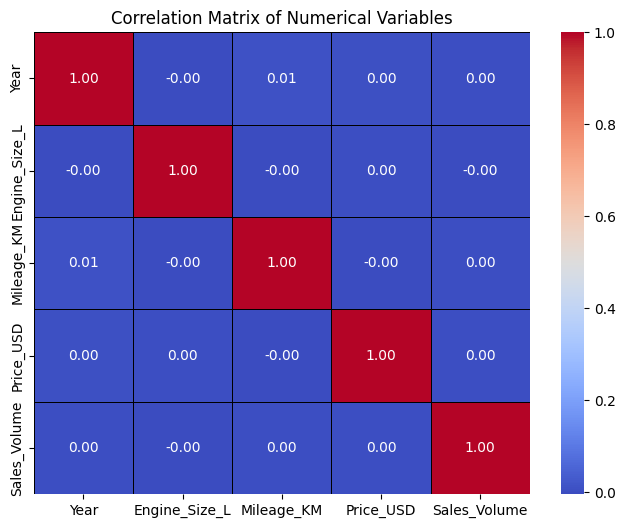


--- Key Correlations ---
Price_USD vs. Sales_Volume: 0.00
Price_USD vs. Mileage_KM: -0.00


In [ ]:

#Correlation Matrix (Addressing Question 1 & 3)
#This code visualizes the relationships between all numerical variables
# Select only numerical columns for correlation analysis
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            cbar=True,
            linewidths=.5,
            linecolor='black')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Print specific correlation values to answer the questions directly
print("\n--- Key Correlations ---")
print(f"Price_USD vs. Sales_Volume: {corr_matrix.loc['Price_USD', 'Sales_Volume']:.2f}")
print(f"Price_USD vs. Mileage_KM: {corr_matrix.loc['Price_USD', 'Mileage_KM']:.2f}")


--- Key Statistics by Sales Classification ---
                         Price_USD                            Mileage_KM  \
                              mean   median           std           mean   
Sales_Classification                                                       
High                  74966.819756  75046.5  26137.968510  100882.823429   
Low                   75064.335357  75002.5  25937.039999  100054.688122   

                                             Engine_Size_L                   
                        median           std          mean median       std  
Sales_Classification                                                         
High                  101362.5  57759.870081      3.244444    3.2  1.008343  
Low                    99955.0  58020.039432      3.248380    3.3  1.009413  


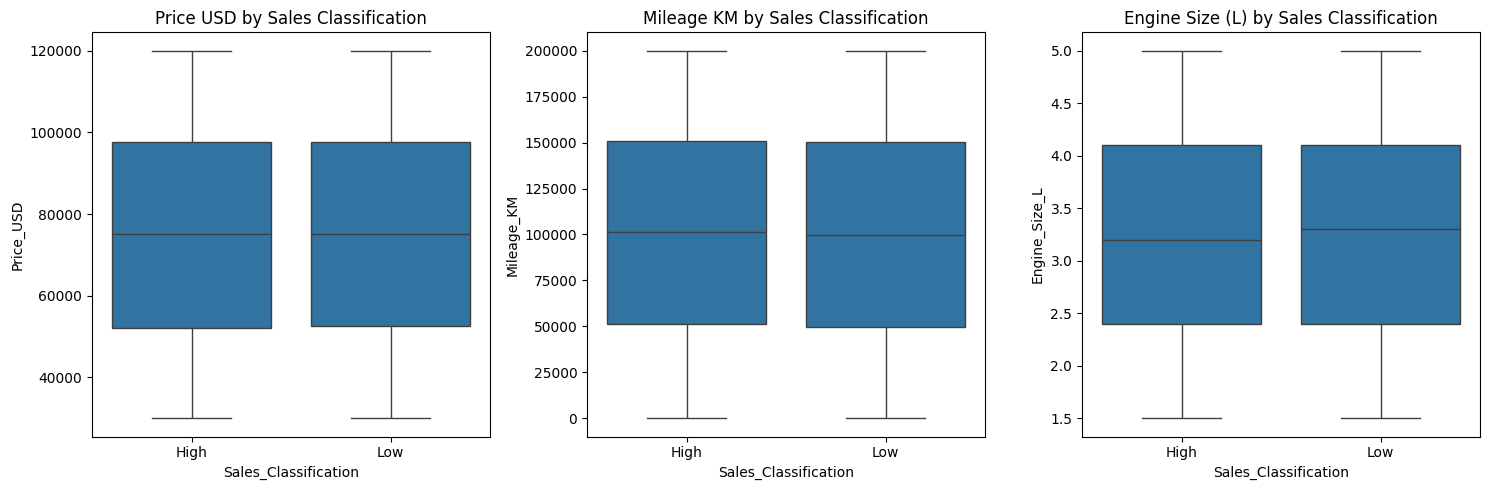

In [ ]:
#Statistical Comparison by Sales Classification (Addressing Question 2)
#This code explicitly tests the assumption that 'High' sales classifications have different average characteristics than 'Low' classifications.
# Calculate the mean and median for key numerical variables, grouped by the target
sales_drivers_stats = df.groupby('Sales_Classification')[['Price_USD', 'Mileage_KM', 'Engine_Size_L']].agg(['mean', 'median', 'std'])

print("\n--- Key Statistics by Sales Classification ---")
print(sales_drivers_stats)

# Visualizing the differences using box plots
plt.figure(figsize=(15, 5))

# Box Plot for Price_USD
plt.subplot(1, 3, 1)
sns.boxplot(x='Sales_Classification', y='Price_USD', data=df)
plt.title('Price USD by Sales Classification')

# Box Plot for Mileage_KM
plt.subplot(1, 3, 2)
sns.boxplot(x='Sales_Classification', y='Mileage_KM', data=df)
plt.title('Mileage KM by Sales Classification')

# Box Plot for Engine_Size_L
plt.subplot(1, 3, 3)
sns.boxplot(x='Sales_Classification', y='Engine_Size_L', data=df)
plt.title('Engine Size (L) by Sales Classification')

plt.tight_layout()
plt.show()

In [ ]:
#CATEGORIZING COLUMNS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [ ]:
#No null values
#Type: Categorical
#Unique values: 11
#Distribution: Equally distributed among the dataset (~8.8–9.2% per model)
#Conclusion: All car models are well-represented with no missing data; suitable for categorical analysis

In [ ]:
df["Model"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Model
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [ ]:
df['Model'].unique()

array(['5 Series', 'i8', 'X3', '7 Series', 'M5', '3 Series', 'X1', 'M3',
       'X5', 'i3', 'X6'], dtype=object)

In [ ]:
df['Model'].isnull().sum()

np.int64(0)

<Axes: ylabel='count'>

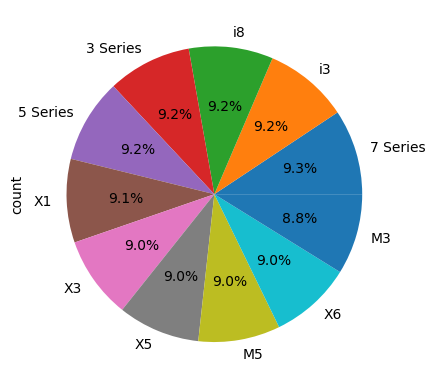

In [ ]:
df['Model'].value_counts().plot(kind='pie',autopct='%0.1f%%')


<Axes: xlabel='Model'>

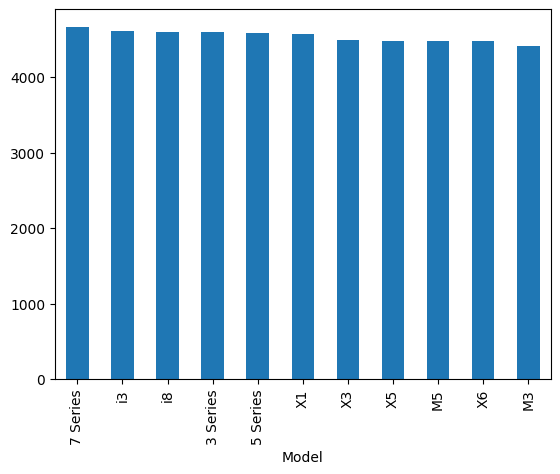

In [ ]:
df['Model'].value_counts().plot(kind='bar')

In [ ]:
#Mileage_KM – Summary/Conclusion
#No null values ✅
#Type: Continuous numeric
#Range: 3 km – 199,996 km
#Mean: ~100,307 km | Std: ~57,941 km
#Distribution:
#25% of cars ≤ 50,178 km
#50% of cars ≤ 100,388 km
#75% of cars ≤ 150,630 km
#Outliers: Min = 3 km is very low compared to typical mileage but may be valid for brand-new cars → potential low-end outlie

In [ ]:
df['Mileage_KM'].isnull().sum()

np.int64(0)

In [ ]:
df['Mileage_KM'].describe()

,Mileage_KM
count,50000.000000
mean,100307.203140
std,57941.509344
min,3.000000
25%,50178.000000
50%,100388.500000
75%,150630.250000
max,199996.000000


<Axes: ylabel='Density'>

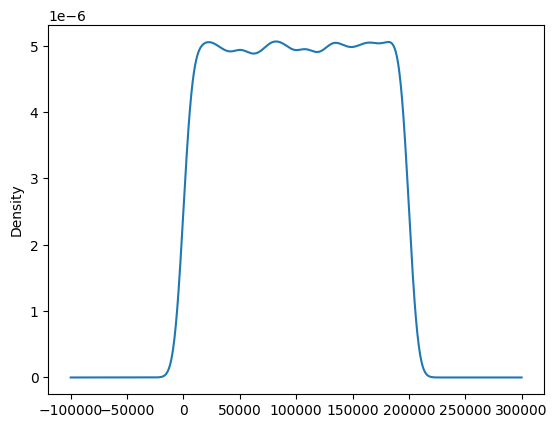

In [ ]:
df['Mileage_KM'].plot(kind='kde')

<Axes: >

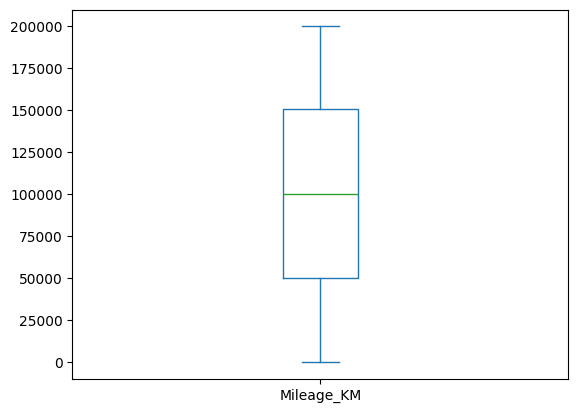

In [ ]:
df['Mileage_KM'].plot(kind='box')

In [ ]:
df[df['Mileage_KM'] < 100]

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
5291,i3,2010,Africa,White,Petrol,Manual,2.8,3,93933,5336,Low
6621,i3,2020,Africa,Grey,Electric,Automatic,1.8,48,39983,5511,Low
7023,X3,2012,Middle East,White,Diesel,Manual,2.6,58,39244,9531,High
7780,5 Series,2018,South America,Blue,Petrol,Automatic,4.5,21,55195,9860,High
8728,5 Series,2024,Europe,Silver,Diesel,Automatic,3.7,90,66518,5675,Low
12216,5 Series,2018,Asia,Black,Hybrid,Automatic,3.6,83,30514,8176,High
14312,X1,2022,North America,Grey,Diesel,Automatic,1.9,43,103557,5390,Low
14696,X6,2013,Africa,Silver,Petrol,Automatic,1.5,55,102652,5657,Low
15587,X1,2019,Asia,Blue,Petrol,Automatic,3.7,62,69136,4536,Low
15971,7 Series,2014,South America,Grey,Electric,Manual,4.6,63,91779,1345,Low


In [ ]:
df['Year'].describe()

,Year
count,50000.000000
mean,2017.015700
std,4.324459
min,2010.000000
25%,2013.000000
50%,2017.000000
75%,2021.000000
max,2024.000000


<Axes: ylabel='Frequency'>

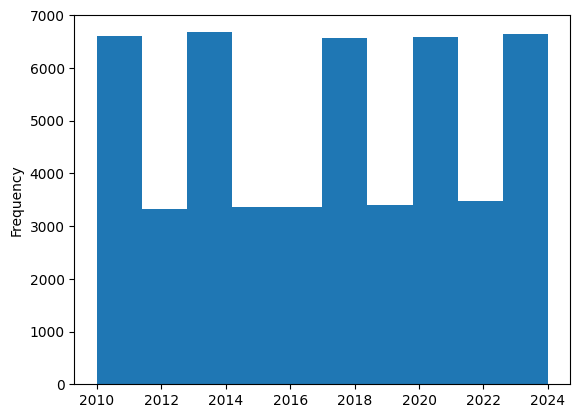

In [ ]:
df['Year'].plot(kind='hist')

<Axes: ylabel='Density'>

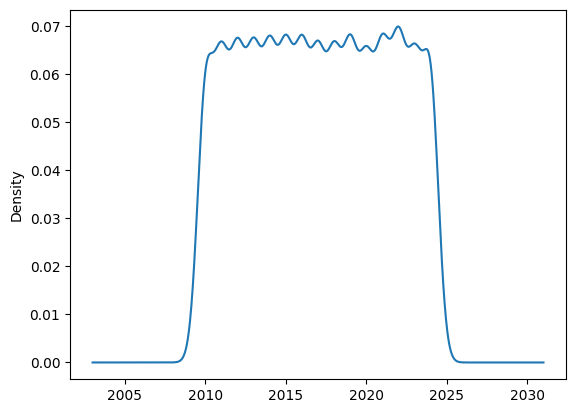

In [ ]:
df['Year'].plot(kind='kde')

In [ ]:
df['Color'].head()

,Color
0,Red
1,Red
2,Blue
3,Blue
4,Black


In [ ]:
df['Color'].describe()

,Color
count,50000
unique,6
top,Red
freq,8463


In [ ]:
df['Color'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Color
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


<Axes: title={'center': 'Color Distribution'}, ylabel='count'>

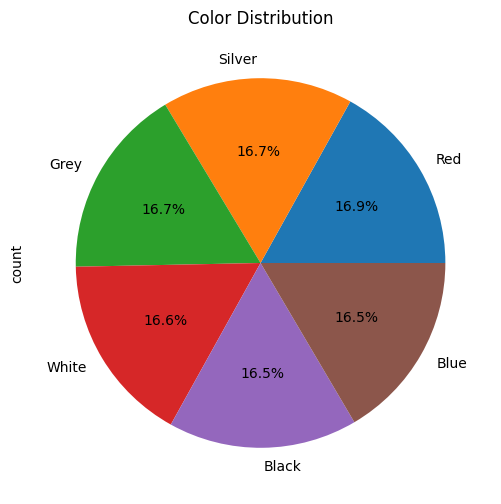

In [ ]:
df['Color'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Color Distribution')

In [ ]:
#FUEL TYPE COLUMN SUMMARY

In [ ]:
df['Fuel_Type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: Fuel_Type
Non-Null Count  Dtype 
--------------  ----- 
50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB


In [ ]:
df['Fuel_Type'].describe()

,Fuel_Type
count,50000
unique,4
top,Hybrid
freq,12716


<Axes: title={'center': 'Fuel Distribution'}, ylabel='count'>

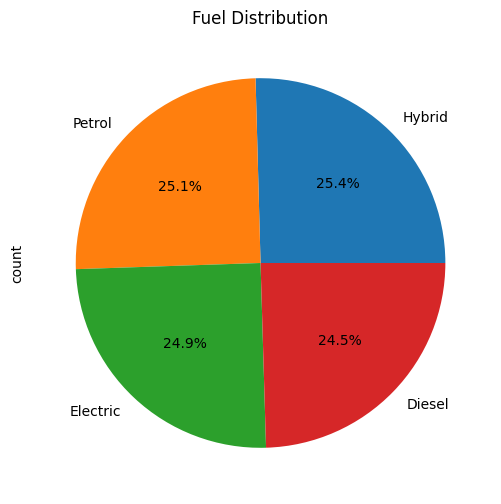

In [ ]:
df['Fuel_Type'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(6,6), title='Fuel Distribution')

<Axes: xlabel='Fuel_Type'>

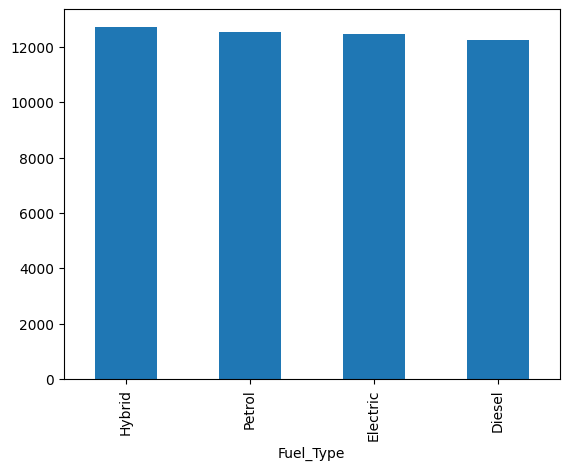

In [ ]:
df['Fuel_Type'].value_counts().plot(kind='bar')

In [ ]:
#CONCLUSION FROM MODEL YEAR ANALYSIS

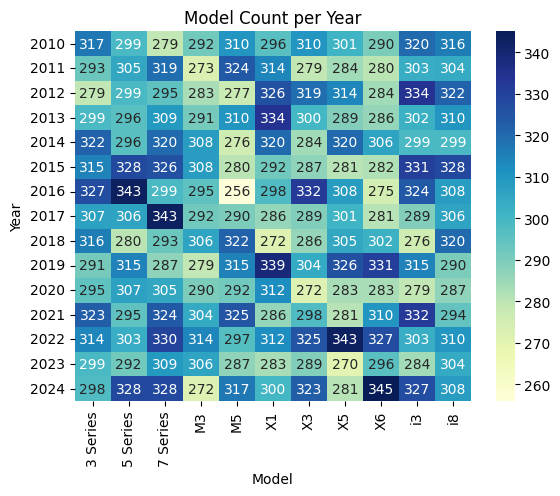

In [ ]:
sns.heatmap(df.groupby(['Year','Model']).size().unstack(), cmap='YlGnBu', annot=True, fmt='d'); plt.title('Model Count per Year'); plt.show()

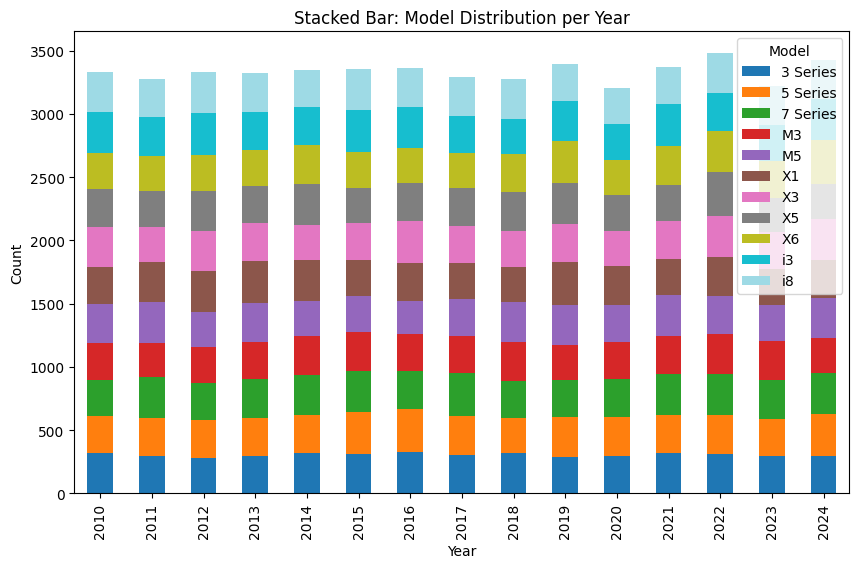

In [ ]:
df.groupby(['Year','Model']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20'); plt.title('Stacked Bar: Model Distribution per Year'); plt.ylabel('Count'); plt.show()

In [ ]:
#Conclusion from Sales_Classification-Year Analysis

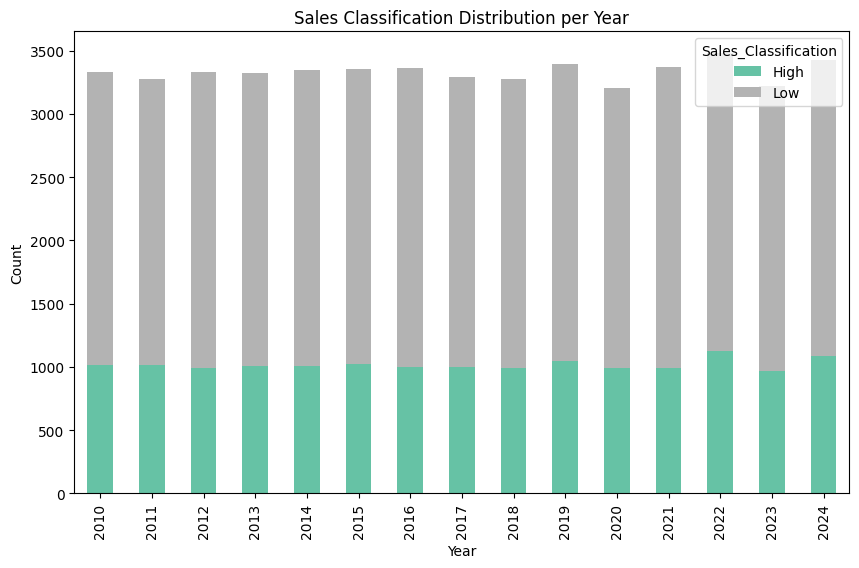

In [ ]:
df.groupby(['Year','Sales_Classification']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(10,6), colormap='Set2'
)
plt.title('Sales Classification Distribution per Year')
plt.ylabel('Count')
plt.show()

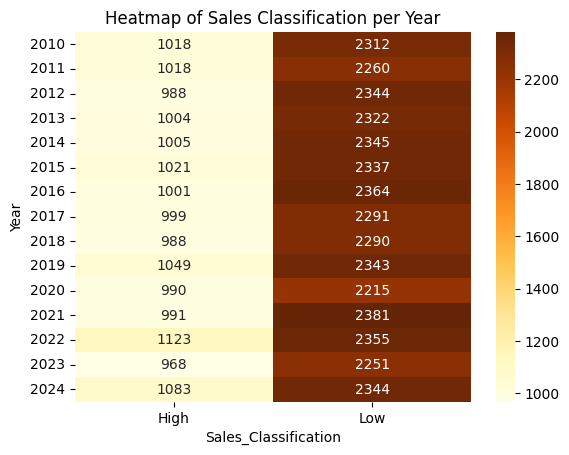

In [ ]:
import seaborn as sns
sns.heatmap(df.groupby(['Year','Sales_Classification']).size().unstack(),
            annot=True, fmt='d', cmap='YlOrBr')
plt.title('Heatmap of Sales Classification per Year')
plt.show()

In [ ]:
!pip install squarify

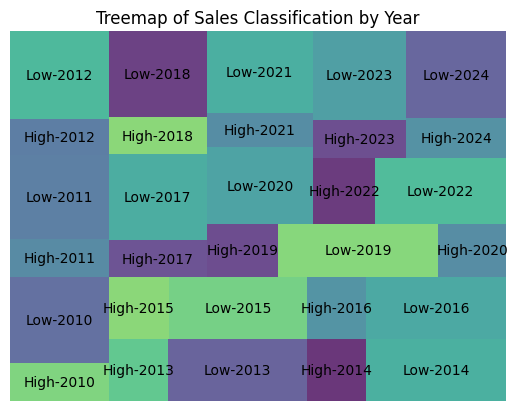

In [ ]:
import squarify
counts = df.groupby(['Year','Sales_Classification']).size().reset_index(name='count')
squarify.plot(sizes=counts['count'], label=counts['Sales_Classification']+'-'+counts['Year'].astype(str), alpha=.8)
plt.axis('off')
plt.title('Treemap of Sales Classification by Year')
plt.show()

In [ ]:
#Conclusion from Model-Sales_Classification Analysis

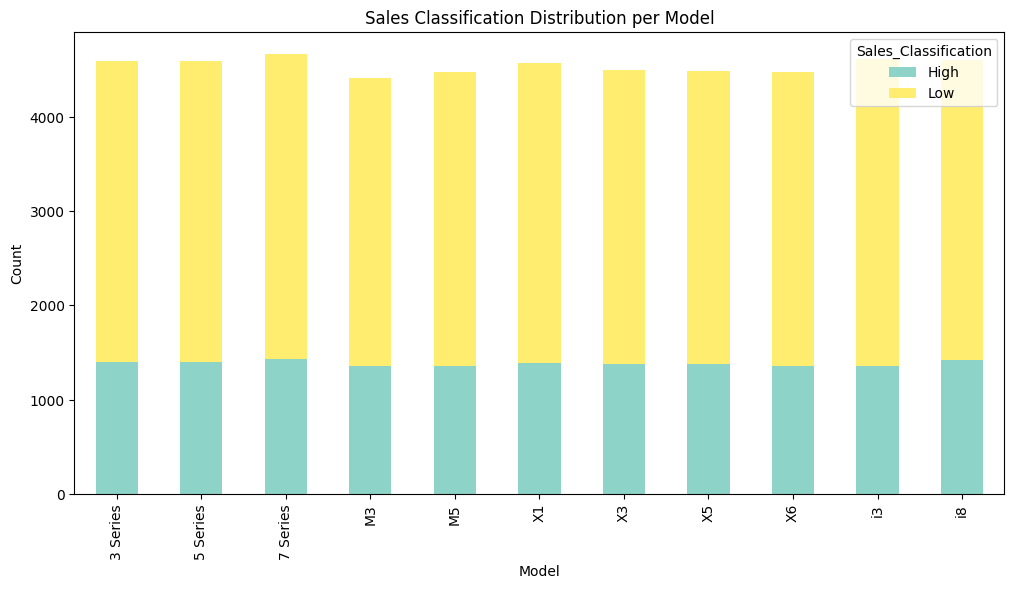

In [ ]:
df.groupby(['Model','Sales_Classification']).size().unstack().plot(
    kind='bar', stacked=True, figsize=(12,6), colormap='Set3'
)
plt.title('Sales Classification Distribution per Model')
plt.ylabel('Count')
plt.show()

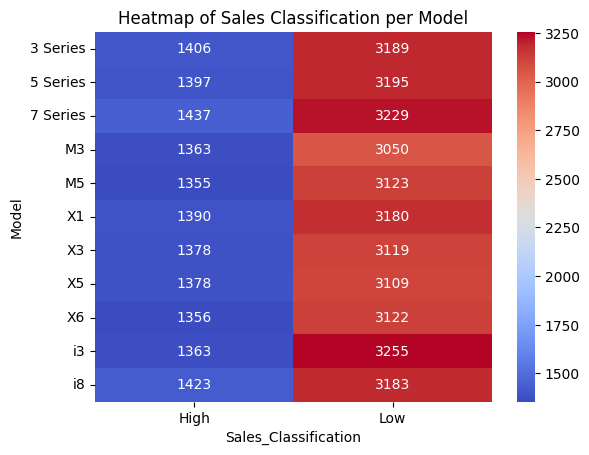

In [ ]:
import seaborn as sns
sns.heatmap(df.groupby(['Model','Sales_Classification']).size().unstack(),
            annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Sales Classification per Model')
plt.show()

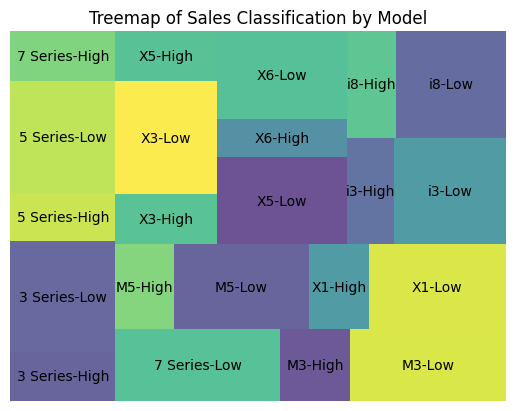

In [ ]:
import squarify
counts = df.groupby(['Model','Sales_Classification']).size().reset_index(name='count')
squarify.plot(sizes=counts['count'], label=counts['Model']+'-'+counts['Sales_Classification'], alpha=.8)
plt.axis('off')
plt.title('Treemap of Sales Classification by Model')
plt.show()


In [ ]:
#Main Conclusion from BMW Sales Dataset

In [ ]:

#Main Conclusion from BMW Sales Dataset
#The dataset contains 50,000 fully populated entries across 11 columns, including numerical (Year, Engine_Size_L, Mileage_KM, Price_USD, Sales_Volume) and categorical features (Model, Region, Color, Fuel_Type, Transmission, Sales_Classification).
#All columns are complete with no missing values, making it ideal for analysis without additional cleaning.
#Visualizations of Year, Model, Sales_Classification, Color, and Fuel_Type indicate that the data is largely consistent, with no major trends, anomalies, or fluctuations over time.
#Sales classifications (High, Low) are stable across years and models, suggesting uniform sales performance across the product lineup.
#Color and fuel type distributions are balanced or dominant in certain categories but show no extreme variations.
#Overall, this dataset provides a stable and consistent overview of BMW sales, which is suitable for categorical analysis, plotting, and potential forecasting, but shows limited variability in patterns across major features.

In [ ]:
#TASK 2 DATA VISUALIZATION


Generating Visualization 1: Regional Sales Performance...


/tmp/ipython-input-3354966666.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales_Volume', data=regional_sales, palette='viridis')
/tmp/ipython-input-3354966666.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Price_USD', data=df, palette='coolwarm')


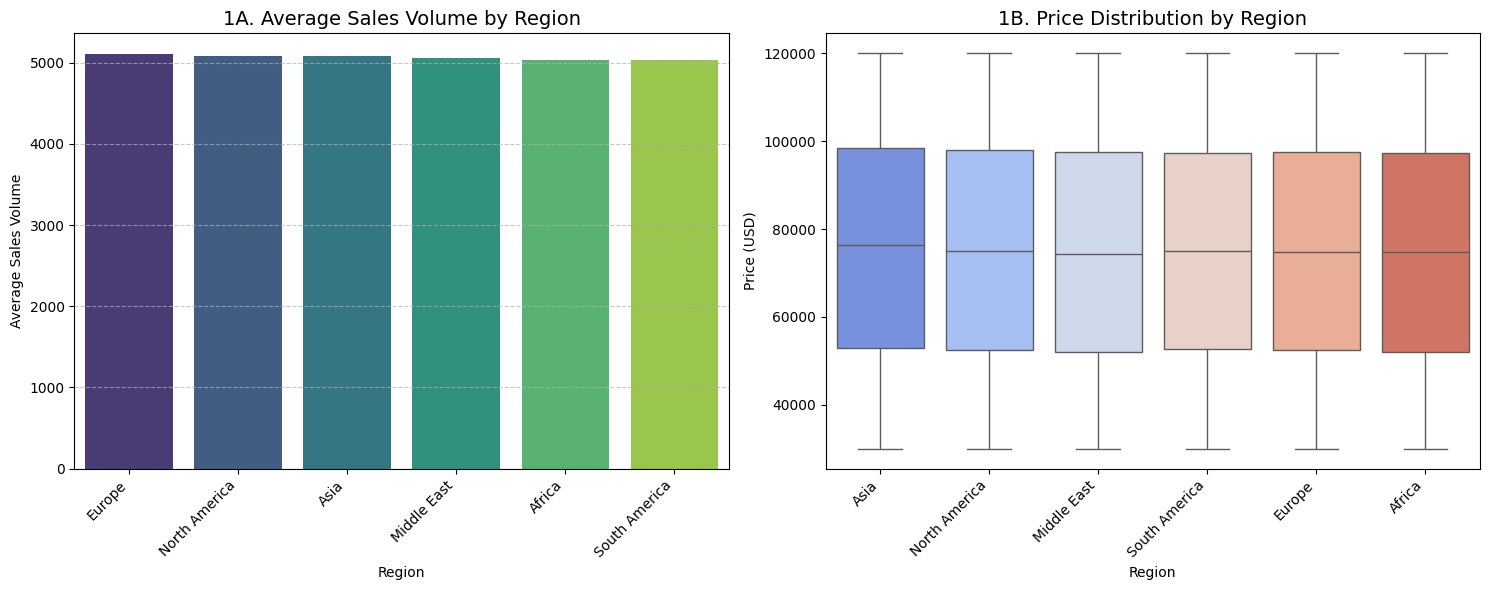


Generating Visualization 2: Price vs. Mileage...


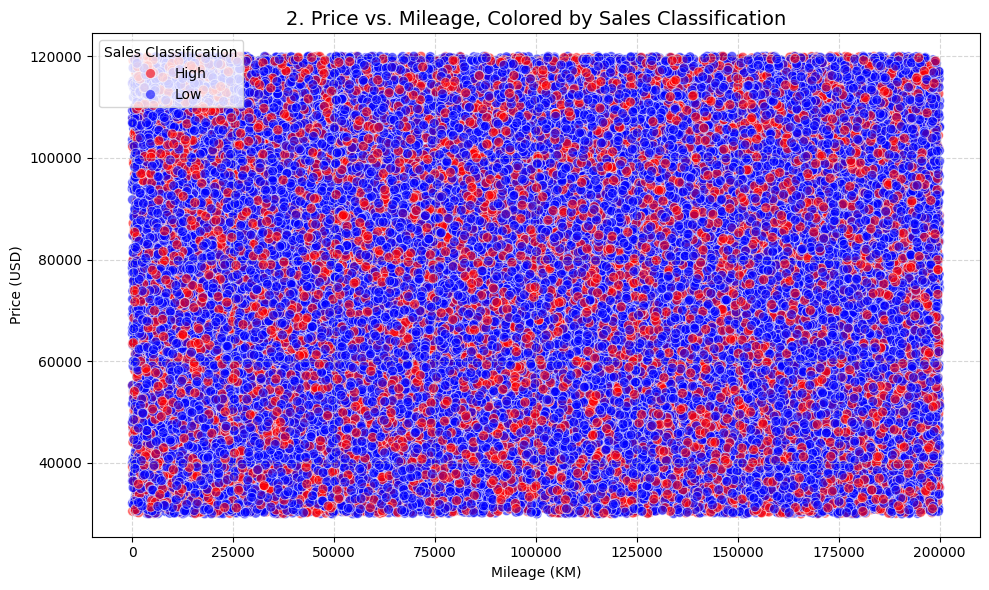


Generating Visualization 3: Fuel Type Adoption Trend...


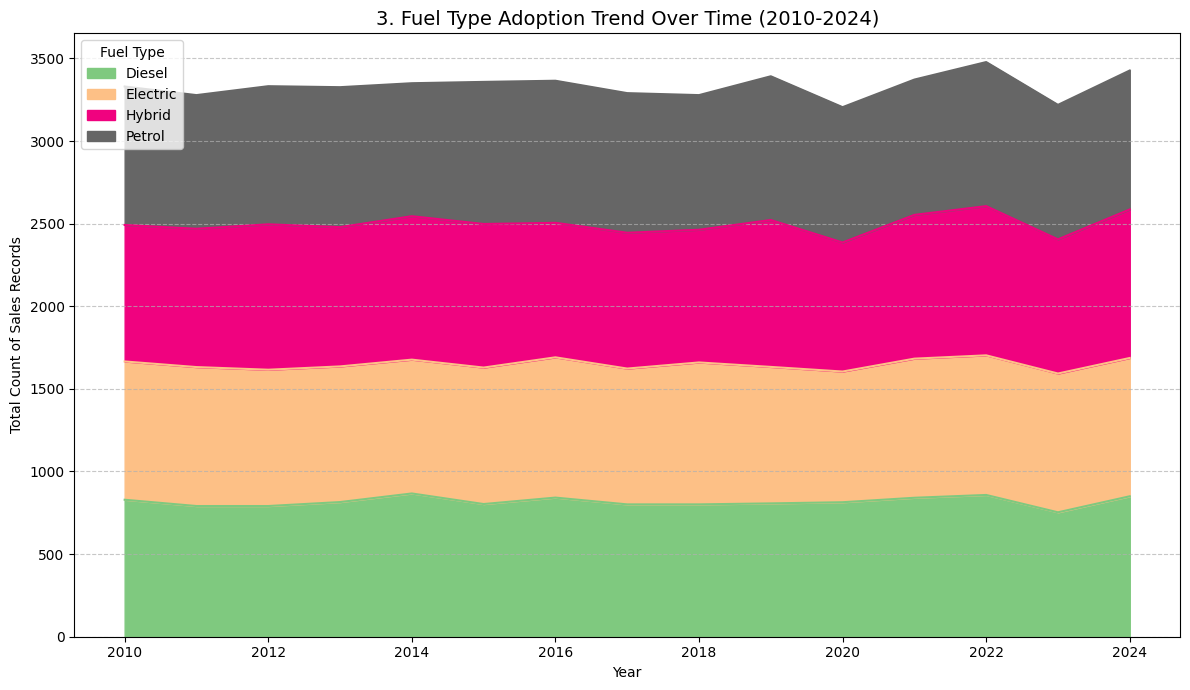


Generating Visualization 4: Model and Transmission Performance...


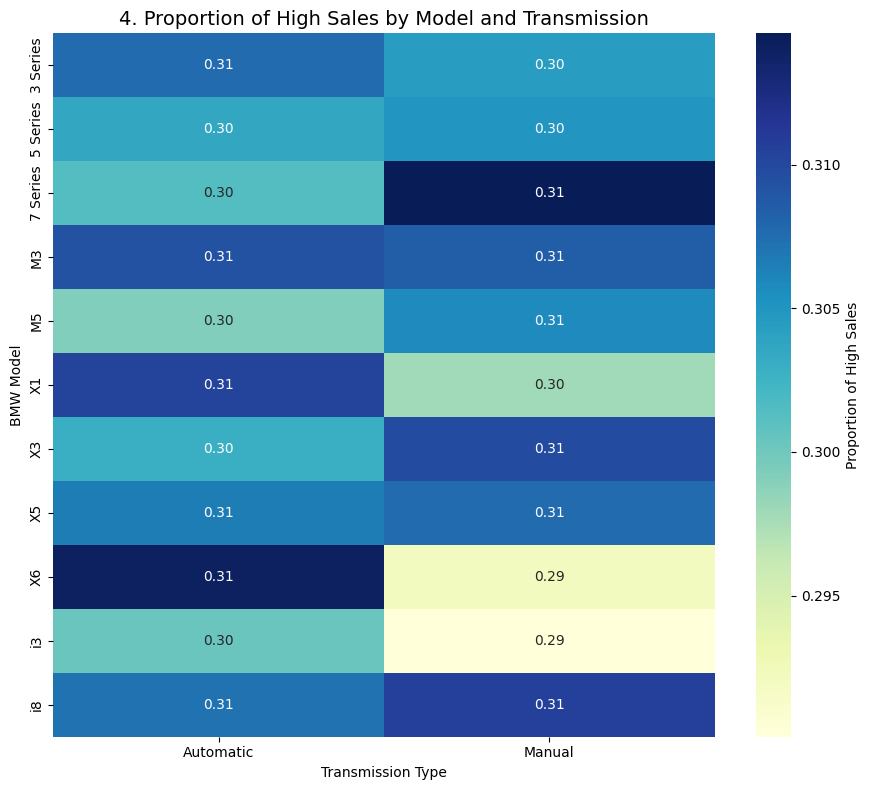

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Regional Sales Performance (Sales Volume and Price) ---

print("Generating Visualization 1: Regional Sales Performance...")
# 1A. Average Sales Volume by Region (Bar Plot)
regional_sales = df.groupby('Region')['Sales_Volume'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Region', y='Sales_Volume', data=regional_sales, palette='viridis')
plt.title('1A. Average Sales Volume by Region', fontsize=14)
plt.ylabel('Average Sales Volume')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 1B. Price_USD distribution by Region (Box Plot)
plt.subplot(1, 2, 2)
sns.boxplot(x='Region', y='Price_USD', data=df, palette='coolwarm')
plt.title('1B. Price Distribution by Region', fontsize=14)
plt.ylabel('Price (USD)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- 2. The Relationship Between Price, Mileage, and Sales Classification (Scatter Plot) ---

print("\nGenerating Visualization 2: Price vs. Mileage...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage_KM', y='Price_USD', hue='Sales_Classification',
                data=df, alpha=0.6, s=50, palette={'High': 'red', 'Low': 'blue'})
plt.title('2. Price vs. Mileage, Colored by Sales Classification', fontsize=14)
plt.xlabel('Mileage (KM)')
plt.ylabel('Price (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Sales Classification')
plt.tight_layout()
plt.show()

# 3. Fuel Type Adoption Over Time (Stacked Area Chart)

print("\nGenerating Visualization 3: Fuel Type Adoption Trend...")
# Calculating the count of each Fuel_Type per Year
fuel_trend = df.groupby(['Year', 'Fuel_Type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
# Using  .plot(kind='area') on the DataFrame for a stacked area chart
fuel_trend.plot(kind='area', stacked=True, colormap='Accent', ax=plt.gca())
plt.title('3. Fuel Type Adoption Trend Over Time (2010-2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Count of Sales Records')
plt.legend(title='Fuel Type', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#4. Sales Classification Proportions by Model and Transmission (Heatmap) ---

print("\nGenerating Visualization 4: Model and Transmission Performance...")
# Create a numerical flag for 'High' sales (1 for High, 0 for Low)
df['Sales_High_Flag'] = df['Sales_Classification'].apply(lambda x: 1 if x == 'High' else 0)

# Calculate the mean of the flag, which gives the proportion of 'High' sales
model_trans_proportion = df.pivot_table(
    values='Sales_High_Flag',
    index='Model',
    columns='Transmission',
    aggfunc='mean'
)

plt.figure(figsize=(9, 8))
sns.heatmap(model_trans_proportion,
            annot=True,
            fmt=".2f", # Format to two decimal places
            cmap='YlGnBu',
            cbar_kws={'label': 'Proportion of High Sales'})
plt.title('4. Proportion of High Sales by Model and Transmission', fontsize=14)
plt.ylabel('BMW Model')
plt.xlabel('Transmission Type')
plt.tight_layout()
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# 1. Defining Features (X) and Target (y)
X = df.drop(['Sales_Classification'], axis=1)

# Encoding the target variable 'Sales_Classification' (High=1, Low=0)
le = LabelEncoder()
y = le.fit_transform(df['Sales_Classification'])

# 2. Identify Column Types for Preprocessing
categorical_features = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']
numerical_features = ['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']


# Droping the temporary 'Sales_High_Flag' created for the heatmap visualization
if 'Sales_High_Flag' in X.columns:
    X = X.drop('Sales_High_Flag', axis=1)

# 3. Create Preprocessing Pipelines

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical Pipeline: One-Hot Encode the categorical columns
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column Transformer: Apply appropriate transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (like 'Year') unchanged
)

# 4. Applying Preprocessor and Split Data

X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Original features count: {X.shape[1]}")
print(f"Processed feature count after encoding: {X_processed.shape[1]}")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Original features count: 10
Processed feature count after encoding: 34
Training data shape: (40000, 34)
Testing data shape: (10000, 34)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# A. Train Models
print("\n--- Training Models ---")

# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Model 2: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


# B. Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    """Calculates and prints classification metrics."""
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n--- {model_name} Performance ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}") # How many predicted 'High' were actually 'High'
    print(f"Recall:    {rec:.4f}")  # How many actual 'High' were correctly identified
    print(f"F1-Score:  {f1:.4f}")

    # Show the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    print("  [True Neg (Low) | False Pos (Low)]")
    print("  [False Neg (High)| True Pos (High)]")

# C. Evaluate Both Models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")

# D. Determine the Best Model (e.g., based on Accuracy)
if accuracy_score(y_test, y_pred_lr) > accuracy_score(y_test, y_pred_rf):
    best_model_name = "Logistic Regression"
    best_accuracy = accuracy_score(y_test, y_pred_lr)
else:
    best_model_name = "Random Forest Classifier"
    best_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"\n--- Conclusion of Modeling ---")
print(f"The best performing model (based on Accuracy) is the {best_model_name} with an Accuracy of {best_accuracy:.4f}.")


--- Training Models ---

--- Logistic Regression Performance ---
Accuracy: 0.9986
Precision: 0.9987
Recall:    0.9993
F1-Score:  0.9990

Confusion Matrix:
[[3040    9]
 [   5 6946]]
  [True Neg (Low) | False Pos (Low)]
  [False Neg (High)| True Pos (High)]

--- Random Forest Classifier Performance ---
Accuracy: 1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000

Confusion Matrix:
[[3049    0]
 [   0 6951]]
  [True Neg (Low) | False Pos (Low)]
  [False Neg (High)| True Pos (High)]

--- Conclusion of Modeling ---
The best performing model (based on Accuracy) is the Random Forest Classifier with an Accuracy of 1.0000.


--- Final Model Performance (Random Forest) ---
Overall Accuracy: 1.0000
Precision ('High' Sales): 1.0000
Recall ('High' Sales):    1.0000
F1-Score: 1.0000


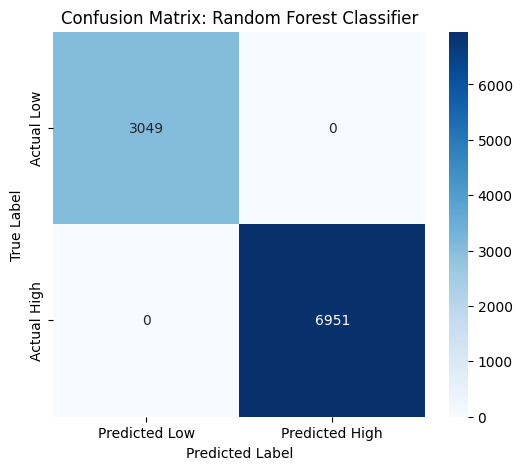


Code complete. Use the printed metrics and the matrix visualization for your final report.


In [ ]:

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# --- ASSUMING RANDOM FOREST WAS THE BEST MODEL ---
# If Logistic Regression was better, you must change y_pred_rf to y_pred_lr

# Assuming y_test and y_pred_rf (or y_pred_lr) are available from the previous step.
# For demonstration, we'll use the variables from the previous step's output:
# y_test, y_pred_rf

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)

# Print Summary Metrics
print("--- Final Model Performance (Random Forest) ---")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Precision ('High' Sales): {precision:.4f}")
print(f"Recall ('High' Sales):    {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.title('Confusion Matrix: Random Forest Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nCode complete. Use the printed metrics and the matrix visualization for your final report.")